In [7]:
import numpy as np
import pandas as pd
import folium, json

import warnings
warnings.filterwarnings('ignore')

import requests
from bs4 import BeautifulSoup
from urllib.parse import quote
from tqdm.notebook import tqdm

import re
import time

import selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

In [3]:
# https://www.hanbit.co.kr/academy/books/new_book_list.html?page=2&cate_cd=&srt=&searchKey=&keyWord=

In [26]:
driver = webdriver.Chrome()
url = 'https://www.hanbit.co.kr/academy/books/new_book_list.html'
driver.get(url)

In [27]:
# //*[@id="container"]/div[2]/div[1]/li[1]/div/div/p[1]/a
# //*[@id="container"]/div[2]/div[1]/li[2]/div/div/p[1]/a
# //*[@id="container"]/div[2]/div[1]/li[6]/div/div/p[1]/a
# 20권씩

In [28]:
i=1
제목 = driver.find_element(By.XPATH, f'//*[@id="container"]/div[2]/div[1]/li[{i}]/div/div/p[1]/a').text
driver.find_element(By.XPATH, f'//*[@id="container"]/div[2]/div[1]/li[{i}]/div/div/p[1]/a').click()

In [8]:
i=1
driver.find_element(By.XPATH, f'//*[@id="container"]/div[2]/div[1]/li[{i}]/div/div/p[1]/a').text

'IT CookBook, JAVA 마스터'

In [29]:
태그 = driver.find_element(By.CSS_SELECTOR, '.tag_area').text.replace("TAG :","").strip()

In [30]:
태그

'매트랩 ,MATLAB ,매트랩 프로그래밍'

In [13]:
driver.back()

In [31]:
driver = webdriver.Chrome()
url = 'https://www.hanbit.co.kr/academy/books/new_book_list.html'
driver.get(url)
time.sleep(1)

bookTag=[]

for i in range(1,10):
    try : 
        for j in range(1,21):
            try : 
                제목 = driver.find_element(By.XPATH, f'//*[@id="container"]/div[2]/div[1]/li[{j}]/div/div/p[1]/a').text
                driver.find_element(By.XPATH, f'//*[@id="container"]/div[2]/div[1]/li[{j}]/div/div/p[1]/a').click()
                time.sleep(1)

                태그 = driver.find_element(By.CSS_SELECTOR, '.tag_area').text.replace("TAG :","").strip()
                
                bookTag.append([제목, 태그])
                
                driver.back()
                time.sleep(1)
            except :
                print(i, j)
        driver.find_element(By.XPATH, f'//*[@id="container"]/div[2]/div[2]/a[{i}]').click()
        time.sleep(1)
    except :
        print(i)

3 6
6 6


## 강사님 방법

In [15]:
base_url = 'https://www.hanbit.co.kr'
sub_url = '/academy/books/new_book_list.html'
url = base_url+sub_url
res = requests.get(url)
soup = BeautifulSoup(res.text, 'html.parser')

In [21]:
lis = soup.select('.sub_book_list')
len(lis)

20

In [ ]:
li = lis[0]
href = li.find('a')['href']
href

In [17]:
res = requests.get(base_url + href)
book_soup = BeautifulSoup(res.text, 'html.parser')
book_soup

<!DOCTYPE html>

<html lang="ko">
<head>
<!--[if lte IE 8]>
<script>
  location.replace('/support/explorer_upgrade.html');
</script>
<![endif]-->
<meta charset="utf-8"/>
<title>처음 배우는 매트랩</title>
<link href="https://www.hanbit.co.kr/images/common/hanbit.ico" rel="shortcut icon"/>
<meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
<meta content="website" property="og:type"/>
<meta content="처음 배우는 매트랩" property="og:title"/>
<meta content="이 책은 MATLAB을 처음 접하는 공학도를 위한 입문서로MATLAB의 주요 기능 및 함수를 쉽고 간결하게 설명한다" property="og:description"/>
<meta content="https://www.hanbit.co.kr/data/books/B7192437175_m.jpg" property="og:image"/>
<meta content="https://www.hanbit.co.kr/academy/books/book_view.html?p_code=B7192437175" property="og:url"/>
<link href="https://www.hanbit.co.kr/academy/books/book_view.html?p_code=B7192437175" rel="canonical">
<meta content="매트랩,MATLAB,매트랩 프로그래밍" name="keywords"/>
<meta content="이 책은 MATLAB을 처음 접하는 공학도를 위한 입문서로MATLAB의 주요 기능 및 함수를 쉽고 간결하게 설명한다" name="description"/>


In [18]:
tags = book_soup.select('.tag_area>a')
len(tags)

3

In [19]:
tag_list = []
for a in tags:
    tag_list.append(a.get_text().strip())
print(tag_list)

['매트랩', 'MATLAB', '매트랩 프로그래밍']


In [20]:
tag_list = []
for page in tqdm(range(1,11)):
    url = f'{base_url}{sub_url}?page={page}'
    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'html.parser')
    lis = soup.select('.sub_book_list')
    
    for li in lis:
        book_url = li.find('a')['href']
        res = requests.get(base_url + book_url)
        book_soup = BeautifulSoup(res.text, 'html.parser')
        tags = book_soup.select('.tag_area>a')
        for a in tags:
            tag_list.append(a.get_text().strip())

  0%|          | 0/10 [00:00<?, ?it/s]

In [22]:
tag_list[100:150]

['발전기',
 '배터리',
 '전기 기계',
 '컴퓨터 비전',
 '딥러닝',
 '파이썬',
 'OpenCV',
 '텐서플로',
 '경영',
 '인사',
 '조직',
 '리더십',
 '리더십 측정',
 '자바',
 'JAVA',
 '객체 지향 프로그래밍',
 'JDK',
 '파이썬',
 '프로그래밍',
 '데이터 과학',
 '데이터 사이언스',
 '데이터 분석',
 '데이터 분석',
 '데이터 과학',
 '파이썬',
 '인공지능',
 '빅데이터',
 '파워포인트',
 '파워포인트2019',
 '오피스',
 '오피스365',
 'powerpoint',
 '오피스 활용',
 '메타버스',
 '가상현실',
 '확장현실',
 'VR',
 'XR',
 '게더타운',
 '코스페이시스',
 '국제경영',
 '세계화',
 '글로벌',
 '무역',
 '투자',
 '외환시장',
 '환율',
 '국제경영전략',
 '수출',
 '수입']

In [23]:
len(tag_list)

1222

# 워드 클라우드 만들기

In [8]:
from wordcloud import WordCloud, STOPWORDS # 주피터는 wordCloud 인것 같음
from PIL import Image # 그림을 불러오는 패키지
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from konlpy.tag import Okt, Kkma, Komoran

In [9]:
from matplotlib import font_manager, rc 
import matplotlib.pyplot as plt
import matplotlib as mpl

#마이너스 표시
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

In [24]:
tag_set = set(tag_list)
len(tag_set)

793

In [25]:
tag_dict = {}
for item in tag_set:
    tag_dict[item] = tag_list.count(item)

In [26]:
# 리스트내포 and 딕셔너리내포
tag_dict = {item : tag_list.count(item) for item in tag_set}

In [27]:
count = 0
for key, value in tag_dict.items():
    print(key, ':', value)
    count += 1
    if count>5:
        break

수출 : 1
공급사슬 : 1
게더타운 : 1
정보 : 1
사례집 : 1
문제 해결 : 3


In [28]:
# 코랩 폰트
# font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf'
# wc = WordCloud(background_color="white", font_path=font_path, max_words=500).generate_from_frequencies(tag_dict)

In [29]:
wc = WordCloud(background_color="white", max_words=500).generate_from_frequencies(tag_dict)

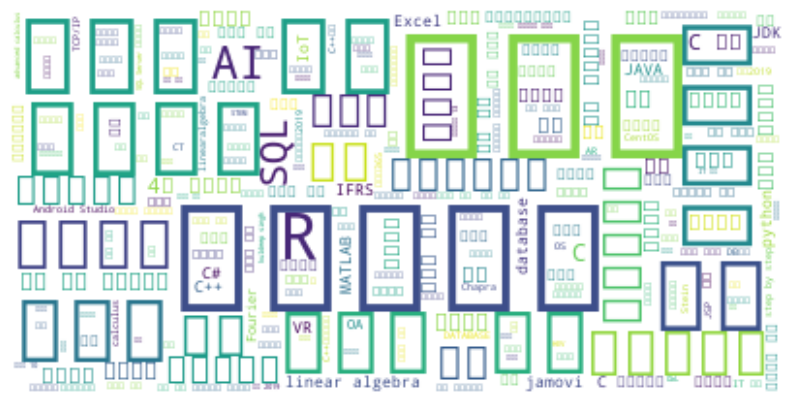

In [30]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()